<a href="https://colab.research.google.com/github/drajaysingh9/datasciencecoursera/blob/main/%5BBSE%5DProphet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install fbprophet

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from fbprophet import Prophet
from math import sqrt
from sklearn.metrics import mean_squared_error

In [ ]:
file = 'AirPassengers.csv'

df = pd.read_csv(file)

In [ ]:
df.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [ ]:
df.rename(columns = {'#Passengers':'AirPassengers'}, inplace = True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Month          144 non-null    object
 1   AirPassengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [ ]:
df['Month'] = pd.DatetimeIndex(df['Month'])
df.dtypes

Month            datetime64[ns]
AirPassengers             int64
dtype: object

In [ ]:
df = df.rename(columns={'Month': 'ds',
                        'AirPassengers': 'y'})

df.head()

,ds,y
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


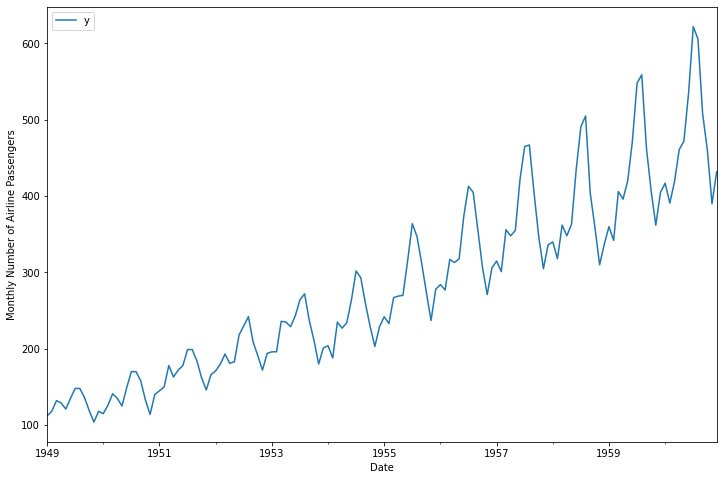

In [ ]:
ax = df.set_index('ds').plot(figsize=(12, 8))
ax.set_ylabel('Monthly Number of Airline Passengers')
ax.set_xlabel('Date')

plt.show()

In [ ]:
my_model = Prophet(interval_width=0.95)

In [ ]:
my_model.fit(df)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
future_dates = my_model.make_future_dataframe(periods=36, freq='MS')
future_dates.head()

,ds
0,1949-01-01
1,1949-02-01
2,1949-03-01
3,1949-04-01
4,1949-05-01


In [ ]:
forecast = my_model.predict(future_dates)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head()

,ds,yhat,yhat_lower,yhat_upper
0,1949-01-01,84.807353,43.146146,129.017546
1,1949-02-01,78.218354,36.377042,121.853865
2,1949-03-01,110.361397,66.065516,154.848262
3,1949-04-01,107.851823,64.643493,149.037374
4,1949-05-01,111.351735,67.507085,154.965415


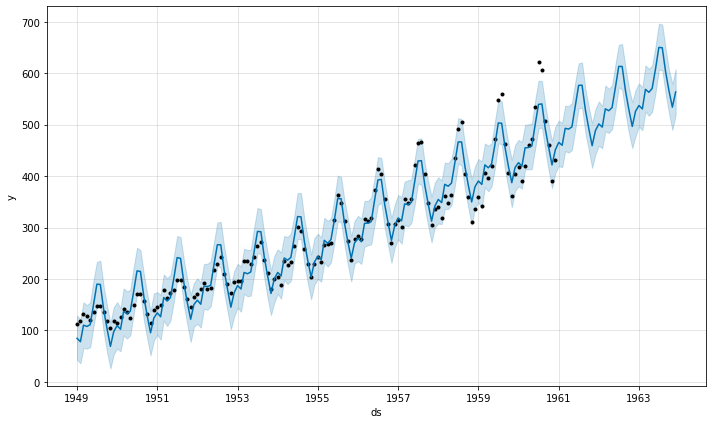

In [ ]:
my_model.plot(forecast, uncertainty=True)
plt.show()

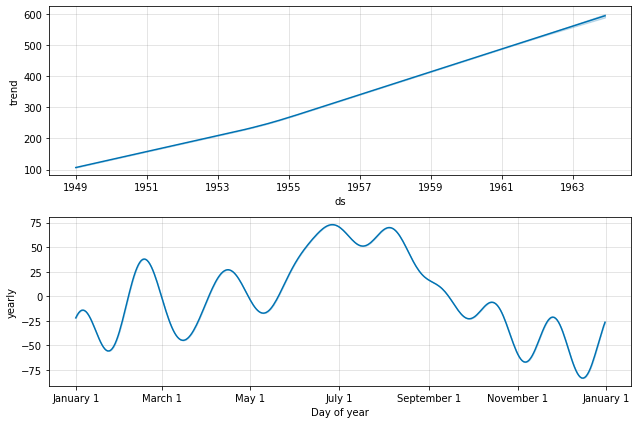

In [ ]:
my_model.plot_components(forecast)
plt.show()

**Forecasted components** 

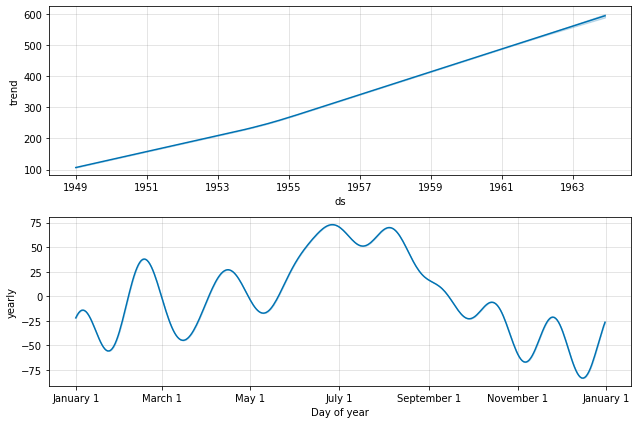

In [ ]:
fig1 = my_model.plot_components(forecast)
plt.show()

**Change Points to Prophet**

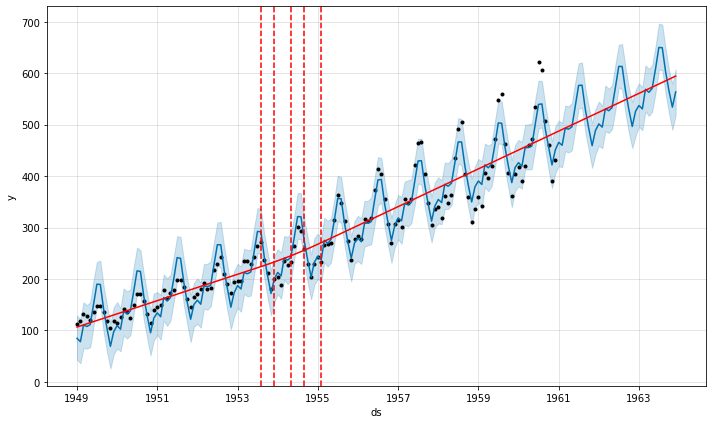

In [ ]:
from fbprophet.plot import add_changepoints_to_plot
fig = my_model.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), my_model, forecast)

In [ ]:
my_model.changepoints

5     1949-06-01
9     1949-10-01
14    1950-03-01
18    1950-07-01
23    1950-12-01
27    1951-04-01
32    1951-09-01
36    1952-01-01
41    1952-06-01
46    1952-11-01
50    1953-03-01
55    1953-08-01
59    1953-12-01
64    1954-05-01
68    1954-09-01
73    1955-02-01
78    1955-07-01
82    1955-11-01
87    1956-04-01
91    1956-08-01
96    1957-01-01
100   1957-05-01
105   1957-10-01
109   1958-02-01
114   1958-07-01
Name: ds, dtype: datetime64[ns]

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


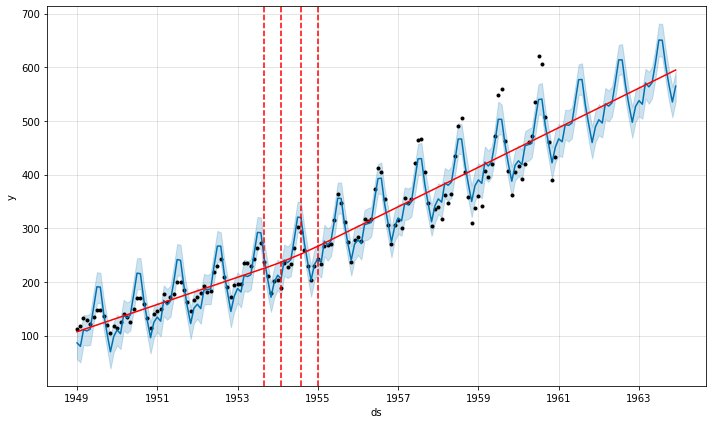

In [ ]:
pro_change= Prophet(changepoint_range=0.9)
forecast = pro_change.fit(df).predict(future_dates)
fig= pro_change.plot(forecast);
a = add_changepoints_to_plot(fig.gca(), pro_change, forecast)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


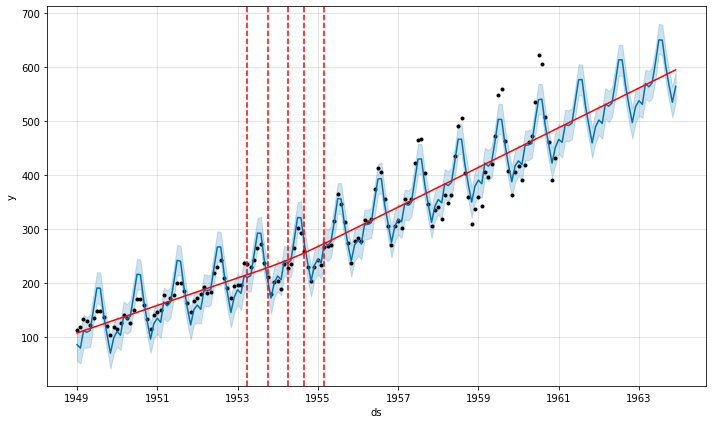

In [ ]:
pro_change= Prophet(n_changepoints=20, yearly_seasonality=True)
forecast = pro_change.fit(df).predict(future_dates)
fig= pro_change.plot(forecast);
a = add_changepoints_to_plot(fig.gca(), pro_change, forecast)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


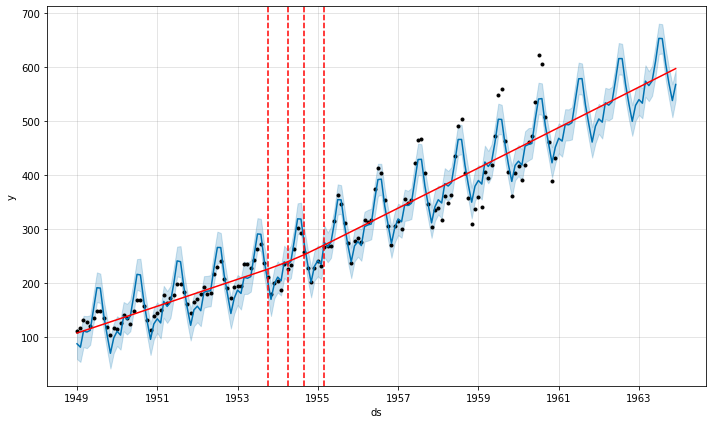

In [ ]:
pro_change= Prophet(n_changepoints=20, yearly_seasonality=True, changepoint_prior_scale=0.08)
forecast = pro_change.fit(df).predict(future_dates)
fig= pro_change.plot(forecast);
a = add_changepoints_to_plot(fig.gca(), pro_change, forecast)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


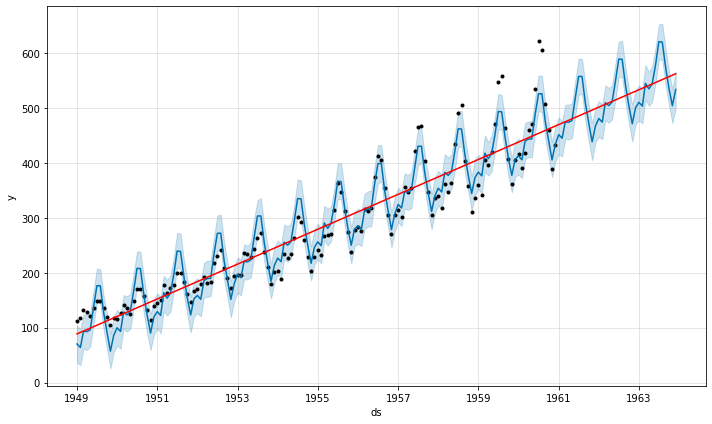

In [ ]:
pro_change= Prophet(n_changepoints=20, yearly_seasonality=True, changepoint_prior_scale=0.001)
forecast = pro_change.fit(df).predict(future_dates)
fig= pro_change.plot(forecast);
a = add_changepoints_to_plot(fig.gca(), pro_change, forecast)

In [ ]:
data = df
trainLen = 108
train = data[:trainLen]
test = data[trainLen:]

In [ ]:
model = Prophet(interval_width=0.95)

In [ ]:
model.fit(train)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
future_dates = model.make_future_dataframe(periods=36, freq='MS')
future_dates.tail()

,ds
139,1960-08-01
140,1960-09-01
141,1960-10-01
142,1960-11-01
143,1960-12-01


In [ ]:
forecast = model.predict(future_dates)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
139,1960-08-01,547.347790,513.537872,575.793273
140,1960-09-01,510.625969,478.057729,541.103302
141,1960-10-01,479.773547,448.759754,510.239176
142,1960-11-01,454.387200,421.825413,486.595930
143,1960-12-01,481.238389,447.849444,510.192879


In [ ]:
predicted = forecast['yhat'][108:]

In [ ]:
error = sqrt(mean_squared_error(test['y'], predicted))
print('Test RMSE: %.3f' % error)

Test RMSE: 44.567


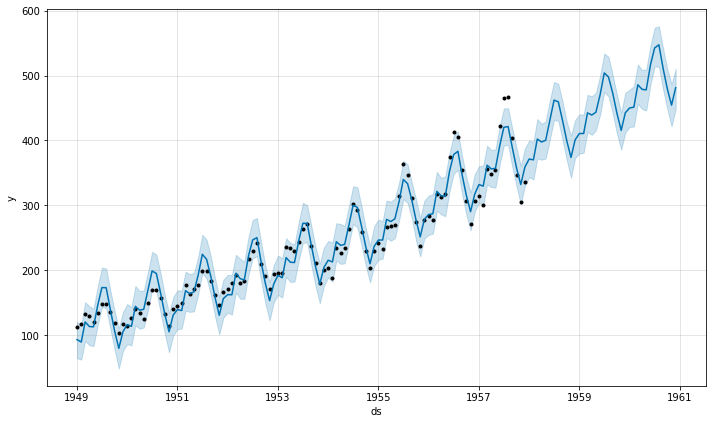

In [ ]:
model.plot(forecast, uncertainty=True)
plt.show()

In [ ]:
#https://facebook.github.io/prophet/docs/trend_changepoints.html